**Import all libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Read the train data

In [2]:
train=pd.read_csv('train_ctrUa4K.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
train.shape

(614, 13)

In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


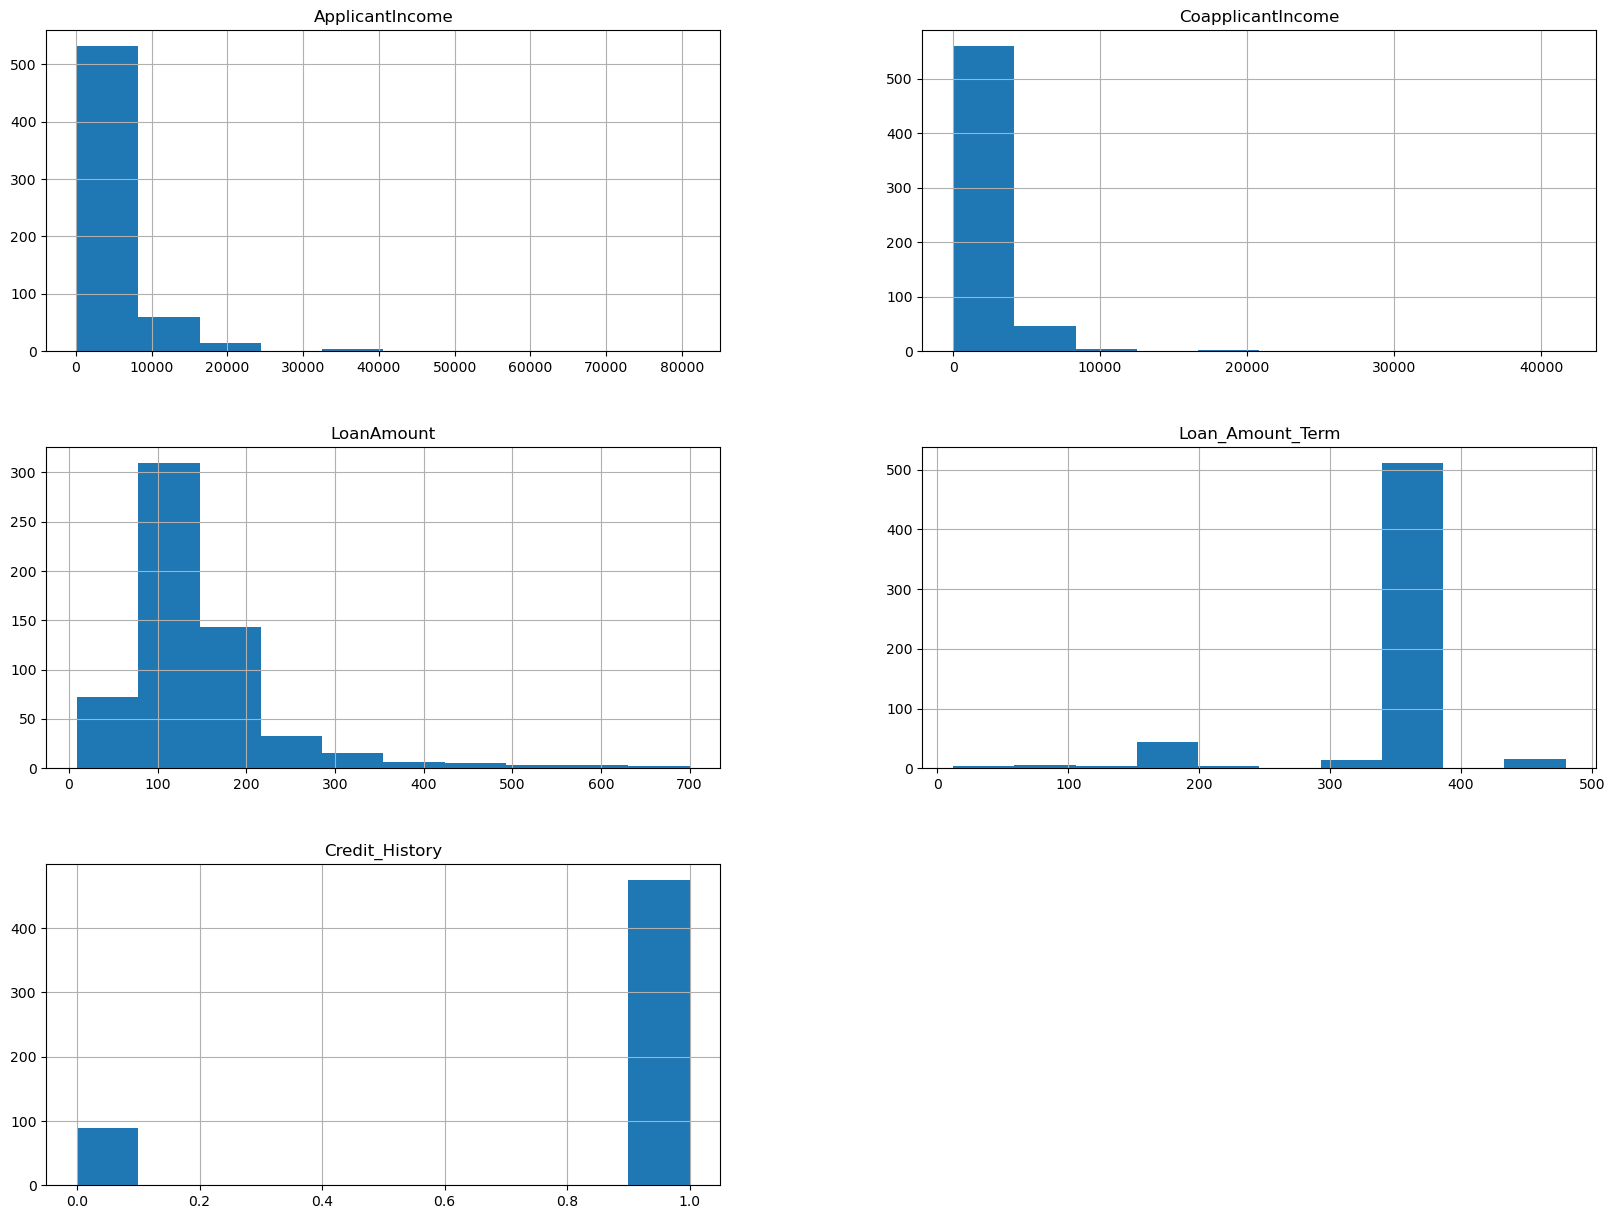

In [8]:
train.hist(figsize=(20,15))
plt.show()

In [9]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

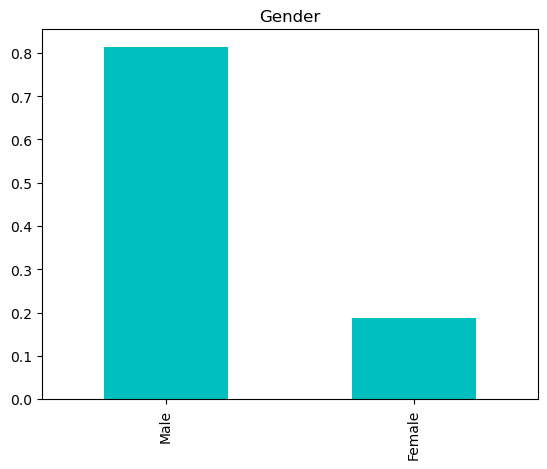

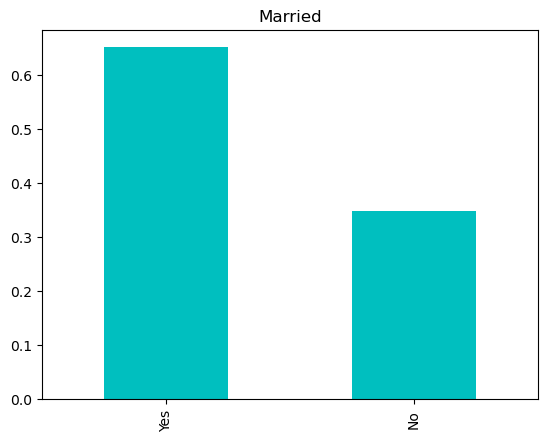

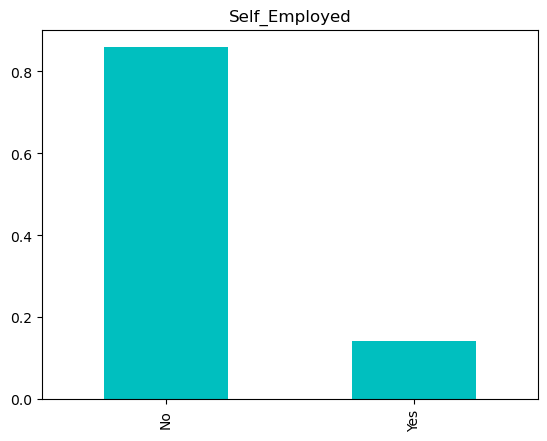

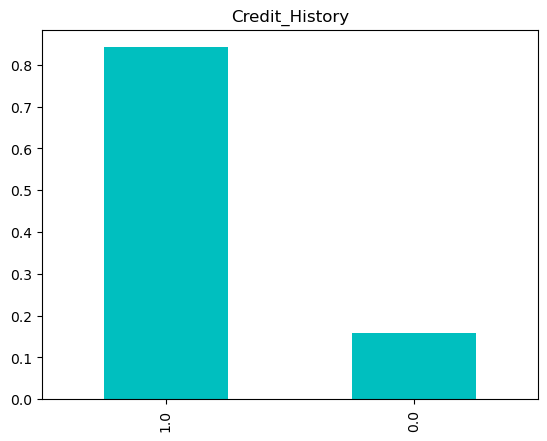

In [10]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender',color = 'c')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married',color = 'c')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed',color = 'c')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History',color = 'c')
plt.show()

**Null value detection and filling**

In [11]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
obj_val=['Gender','Married','Dependents','Self_Employed']
for i in obj_val:
  train[i]=train[i].fillna(train[i].mode())


In [14]:
int_val=['LoanAmount','Loan_Amount_Term','Credit_History']
for k in int_val:
  train[k]=train[k].fillna(train[k].median())

In [15]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#Since data is sensitive no use for detection of outliers and handling them

In [16]:
train.drop(['Loan_ID'],axis=1,inplace=True)

#Data Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [20]:
cols=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']

for j in cols:
  train[j]=le.fit_transform(train[j])

In [21]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


#Scaling using MinMaxScaler

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
minmax=MinMaxScaler()

In [24]:
scaled_train=minmax.fit_transform(train)

In [25]:
train=pd.DataFrame(scaled_train)

In [26]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.419381,0.328990,0.210505,0.218241,0.118893,0.064978,0.038910,0.197905,0.706005,0.855049,0.518730,0.687296
std,0.210876,0.242486,0.280133,0.413389,0.267368,0.075560,0.070229,0.121718,0.137668,0.352339,0.393741,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,0.000000,0.000000,0.033735,0.000000,0.132055,0.743590,1.000000,0.000000,0.000000
50%,0.500000,0.500000,0.000000,0.000000,0.000000,0.045300,0.028524,0.172214,0.743590,1.000000,0.500000,1.000000
75%,0.500000,0.500000,0.500000,0.000000,0.000000,0.069821,0.055134,0.225398,0.743590,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Load the test_data

In [27]:
test=pd.read_csv('test_lAUu6dG.csv')

#preprocessing

In [28]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [29]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [30]:
test.shape

(367, 12)

In [31]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


#Check for null values

In [33]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [34]:
test_obj=['Gender','Dependents','Self_Employed']
for f in test_obj:
  test[f]=test[f].fillna(test[f].mode())

In [35]:
test_int=['LoanAmount','Loan_Amount_Term','Credit_History']
for u in test_int:
  test[u]=test[u].fillna(test[u].median())

In [36]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [37]:
test.drop(['Loan_ID'],axis=1,inplace=True)

#Encoding

In [38]:
test_enco=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for e in test_enco:
  test[e]=le.fit_transform(test[e])

In [39]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


#Scaling

In [40]:
scaled_test=minmax.fit_transform(test)

In [41]:
test=pd.DataFrame(scaled_test)

In [42]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.419619,0.634877,0.228883,0.228883,0.113079,0.066258,0.065399,0.206860,0.710597,0.839237,0.539510
std,0.221018,0.482122,0.294062,0.420687,0.274396,0.067707,0.097260,0.116781,0.136410,0.367814,0.412168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,0.000000,0.000000,0.039488,0.000000,0.139847,0.746835,1.000000,0.000000
50%,0.500000,1.000000,0.000000,0.000000,0.000000,0.052200,0.042708,0.185824,0.746835,1.000000,0.500000
75%,0.500000,1.000000,0.500000,0.000000,0.000000,0.069765,0.101271,0.248084,0.746835,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we can do all the modelling in train

In [43]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.5,0.0,0.00,0.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,1.0,1.0
1,0.5,0.5,0.25,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.5,0.5,0.00,0.0,0.5,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0.5,0.5,0.00,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0.5,0.0,0.00,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


#Train_test_split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X=train.drop(11,axis=1)
y=train[11]

In [46]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.5,0.0,0.00,0.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,1.0
1,0.5,0.5,0.25,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0
2,0.5,0.5,0.00,0.0,0.5,0.035250,0.000000,0.082489,0.74359,1.0,1.0
3,0.5,0.5,0.00,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0
4,0.5,0.0,0.00,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0


In [47]:
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: 11, dtype: float64

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#LogisticRegression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
logr=LogisticRegression()

In [51]:
logr_model=logr.fit(X_train,y_train)
logr_pred=logr_model.predict(X_test)
accuracy_score(y_test,logr_pred)

0.7886178861788617

In [52]:
logr_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

#Decision tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dec_class = DecisionTreeClassifier()
dec_model = dec_class.fit(X_train,y_train)
dec_pred = dec_model.predict(X_test)
accuracy_score(y_test,dec_pred)

0.6910569105691057

In [54]:
dec_pred

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1.])

#SVM

In [55]:
from sklearn.svm import SVC
svm_class = SVC(kernel = 'linear')
svm_model = svm_class.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)
accuracy_score(y_test,svm_pred)

0.7886178861788617

In [56]:
svm_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

#Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rand_class = RandomForestClassifier()
rand_model = rand_class.fit(X_train,y_train)
rand_pred = rand_model.predict(X_test)
accuracy_score(y_test,rand_pred)

0.7804878048780488

In [58]:
rand_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1.])

#Cross Validation

In [59]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=10)

In [60]:
skf_logr = cross_val_score(logr_model,X,y,cv=skf)
np.mean(skf_logr)

0.8095716552088842

#The best model among these are LogisticRegression

In [61]:
logr_pred = logr_model.predict(test)

#Samples ubmission data reading

In [62]:
sample_data=pd.read_csv('sample_submission_49d68Cx.csv')

In [63]:
sample_data

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [64]:
sample_data['Loan_Status']=logr_pred

In [65]:
sample_data['Loan_Status'].replace(0, 'N',inplace=True)
sample_data['Loan_Status'].replace(1, 'Y',inplace=True)

In [66]:
sample_data

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


#converting sample submission dataset to csv

In [67]:
pd.DataFrame(sample_data, columns=['Loan_ID','Loan_Status']).to_csv('nimisha_Log_reg.csv',index=False)

In [68]:
data_log_reg=pd.read_csv('nimisha_Log_reg.csv')

In [69]:
data_log_reg

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


#Predicted by Decision tree

In [70]:
dec_tree_prediction=dec_model.predict(test)
sample_data['Loan_Status']=dec_tree_prediction
sample_data['Loan_Status'].replace(0, 'N',inplace=True)
sample_data['Loan_Status'].replace(1, 'Y',inplace=True)

In [71]:
pd.DataFrame(sample_data, columns=['Loan_ID','Loan_Status']).to_csv('nimisha_decision_tree.csv',index=False)

In [72]:
data_decision_tree=pd.read_csv('nimisha_decision_tree.csv')

In [73]:
data_decision_tree

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


#Predicted by svm

In [74]:
svm_prediction = svm_model.predict(test)
sample_data['Loan_Status']=svm_prediction
sample_data['Loan_Status'].replace(0, 'N',inplace=True)
sample_data['Loan_Status'].replace(1, 'Y',inplace=True)

In [75]:
pd.DataFrame(sample_data, columns=['Loan_ID','Loan_Status']).to_csv('nimisha_svm.csv',index=False)

In [76]:
data_svm=pd.read_csv('nimisha_svm.csv')

In [77]:
data_svm

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


#Predicted using RandomForest

In [78]:
random_prediction= rand_model.predict(test)
sample_data['Loan_Status']=random_prediction
sample_data['Loan_Status'].replace(0, 'N',inplace=True)
sample_data['Loan_Status'].replace(1, 'Y',inplace=True)

In [79]:
pd.DataFrame(sample_data, columns=['Loan_ID','Loan_Status']).to_csv('nimisha_ran_forest.csv',index=False)

In [80]:
data_random_forest=pd.read_csv('nimisha_ran_forest.csv')

In [81]:
data_random_forest

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
